Throughout this project, you'll need to have a working knowledge of how to simulate certain aspects of the experiment using a computer programming language. The preferred language within the McMorran Lab is Python 3. For a review of how to get started in python, please see the file located within this directory titled 'Gettingstartedwithpython.docx' . This document assumes a base knowledge of how to use pre-exisiting functions as well as how to write your own basic functions in python. If at any point you don't understand how to write a piece of code to solve a problem, I encourage you to first perform a web search on how to solve the problem and if after a sufficient number of clicks it is still unanswerable, ask! 

If you're unfamiliar with ipython-notebooks, welcome! The beauty of ipython notebooks is the ability to write both Latex math and text inline while also writing executable lines of code. At the end, you can save the .ipynb file while also exporting your work to a .pdf file, making it extremely useful for small paper writeups or presentations! To demonstrate this, insert 'code' boxes underneath the following text prompts to solve the problems.

In [1]:
import numpy as np #http://www.numpy.org/
import matplotlib.pyplot as plt # https://matplotlib.org/
from scipy import signal

Here's a test function detailing some options for plotting using matplotlib.pyplot. Note that is important as a scientist to label your plots, including plot titles as well as x and y labels. You might want to write your own plot function so that you don't need to copy and paste the six lines of code every time you make a plot.

[0 1 2 3 4 5 6 7 8 9] [ 0 10 20 30 40 50 60 70 80 90]


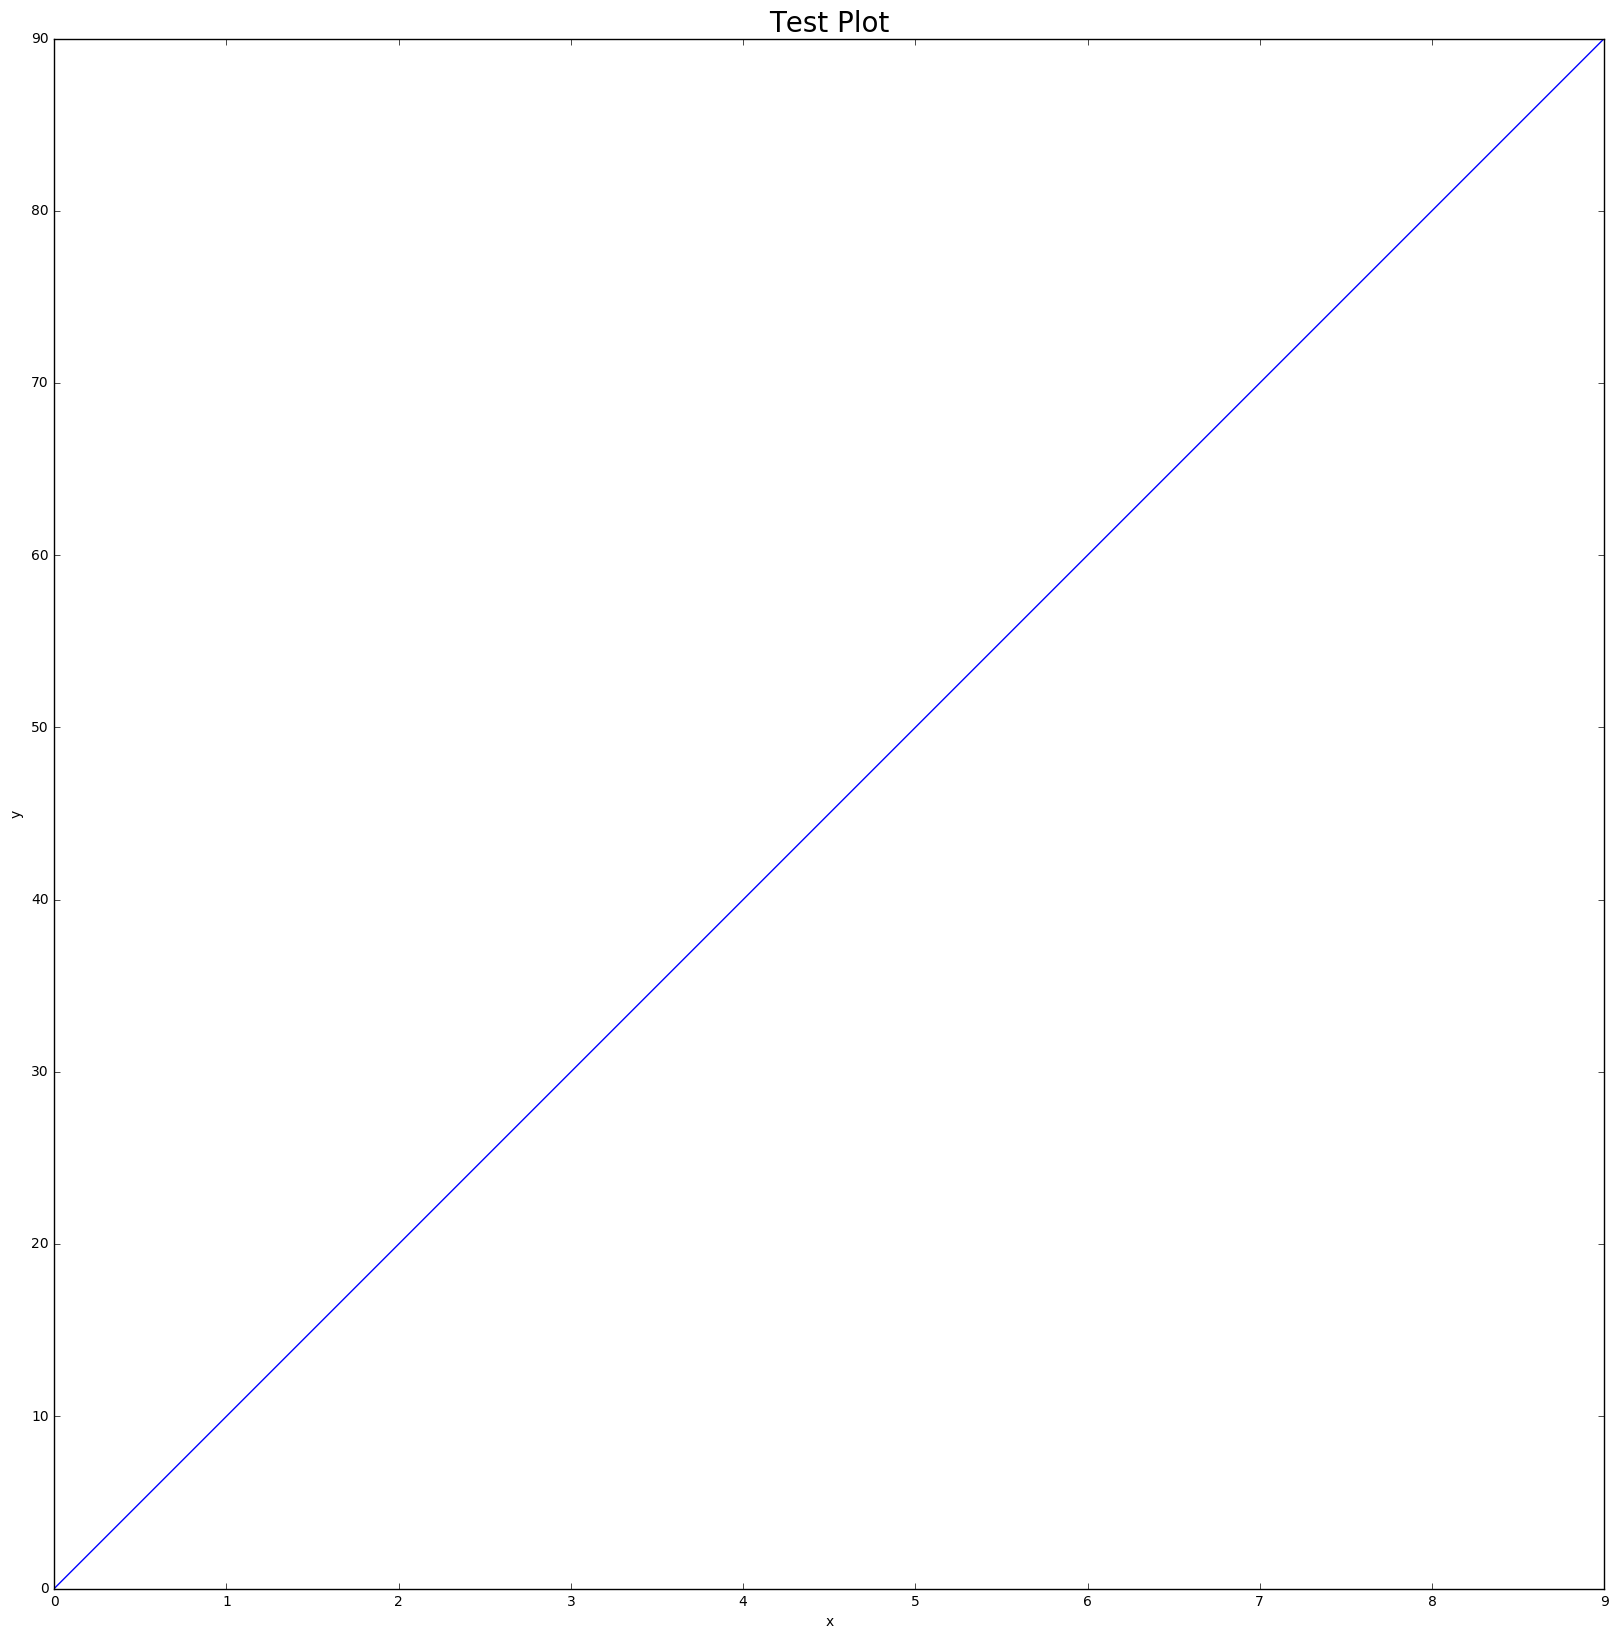

In [2]:
a = np.arange(10)
b = 10*a

print(a,b)

plt.figure(figsize=(20,20))
plt.plot(a,b)
plt.title("Test Plot", fontsize=20)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
#First, let's define a plotting function.

def plot_1D(x, y, Title='Add Title', x_label='Add x_label', y_label='Add y_label', x_lim=None, y_lim=None, fig_size=(20,20), marker_=None, fontsize_title = 15, fontsize_label = 10):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=fig_size)
    plt.plot(x, y, marker=marker_)
    plt.title(Title, fontsize=fontsize_title)
    plt.xlabel(x_label, fontsize=fontsize_label)
    plt.ylabel(y_label, fontsize=fontsize_label)
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    plt.xticks(fontsize=fontsize_label)
    plt.yticks(fontsize=fontsize_label)
    plt.show()

$1$. Write some code to plot a square wave function in 1D. 

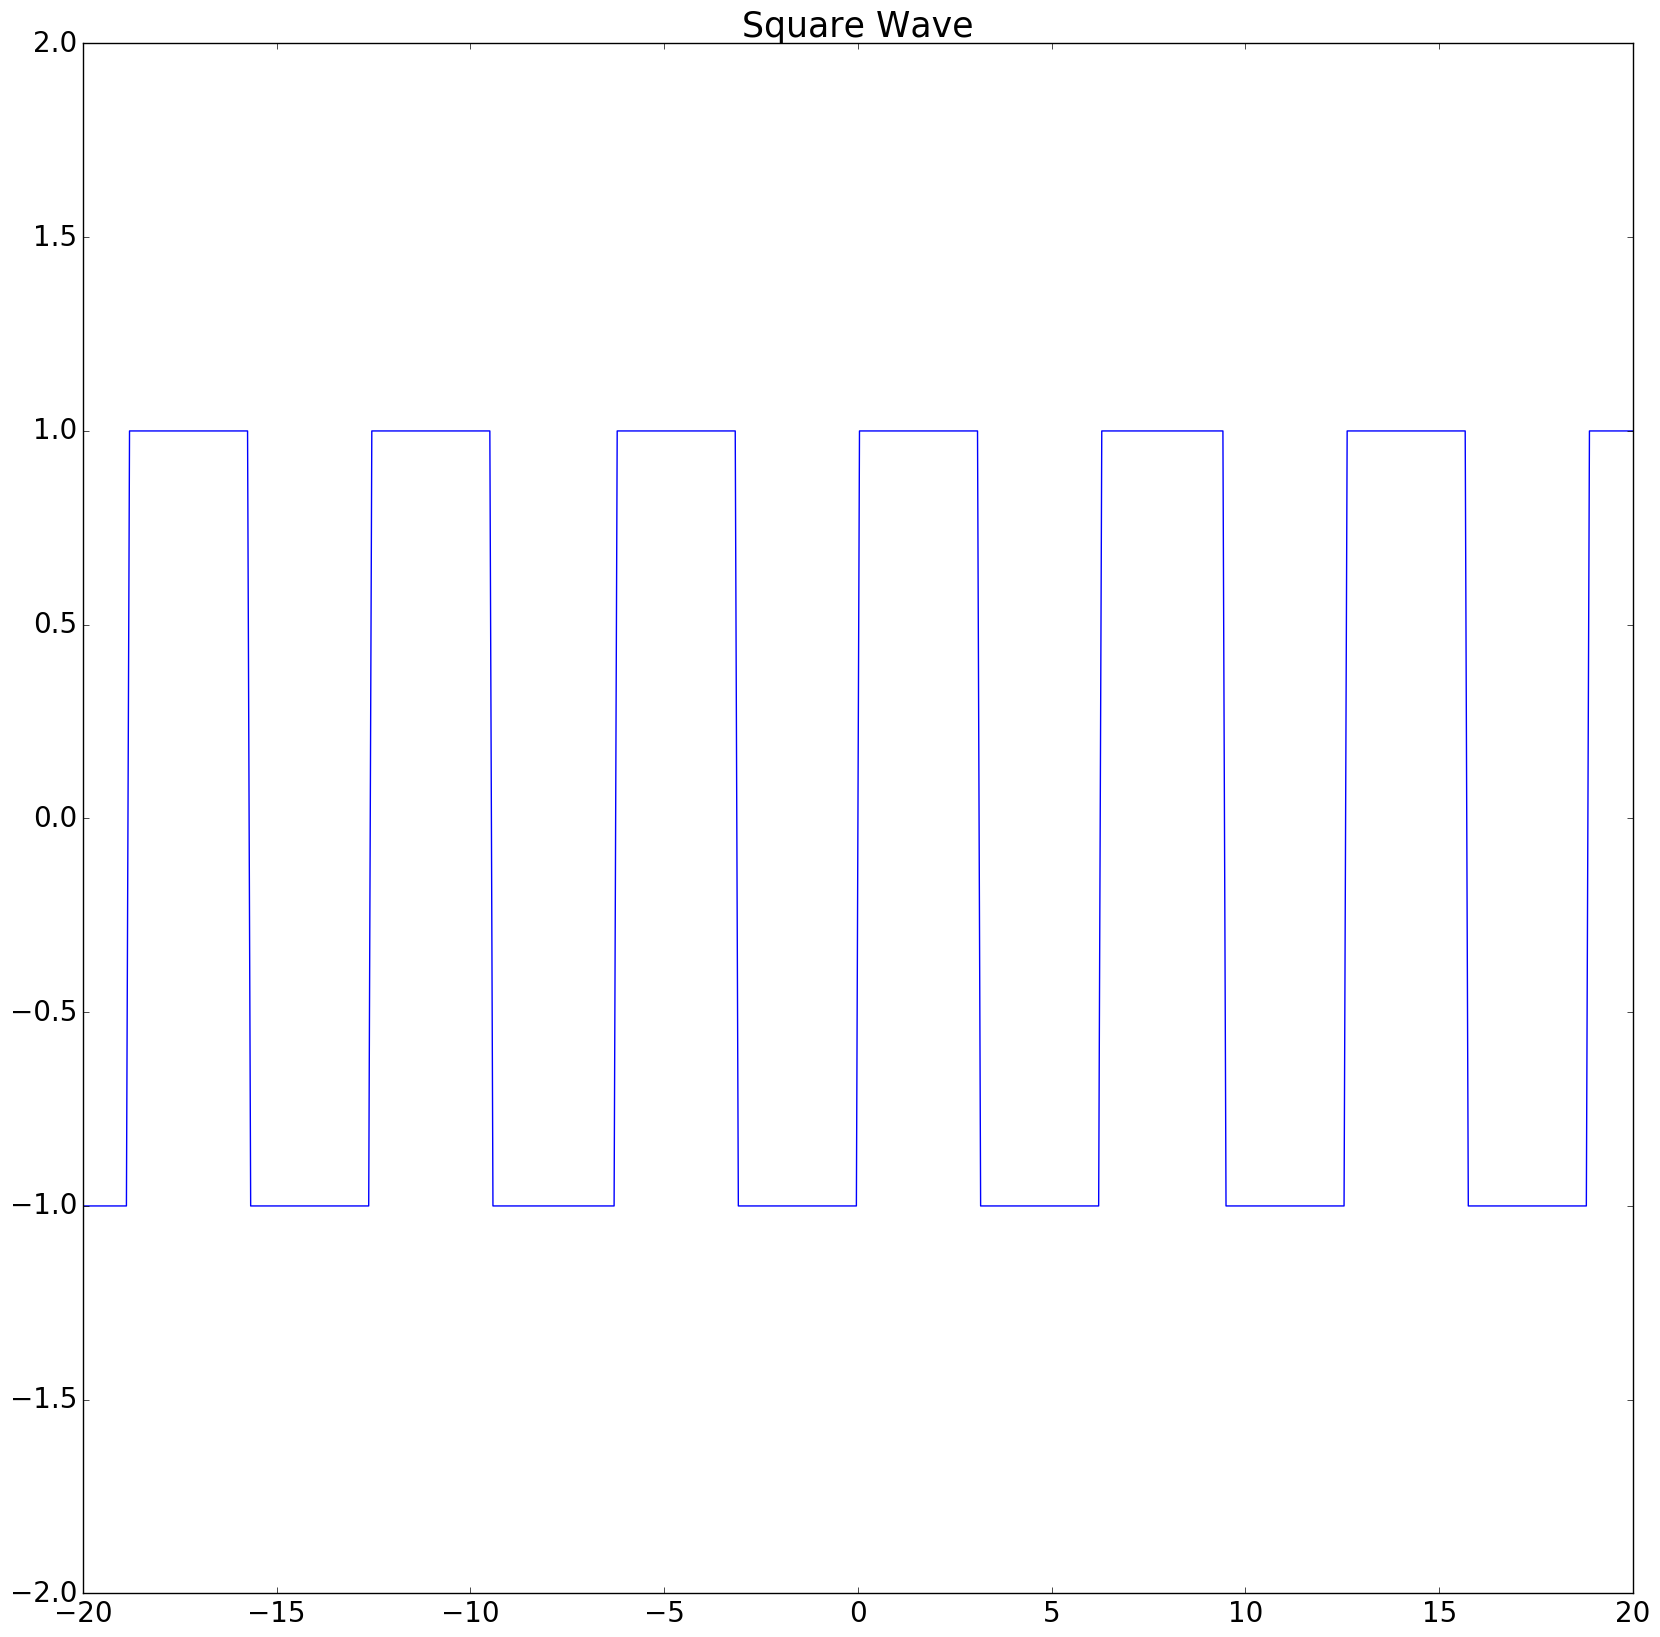

In [4]:
x = np.linspace(-20,20,500)
square = signal.square(x)

plot_1D(x, square, Title='Square Wave', x_label='', y_label='', fontsize_label=20, fontsize_title=25, y_lim=(-2,2))


$2$. Take the fourier transform of the function and plot it in 1D. Explain the significance of the features in the plot?

Hint:  https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.fft.html

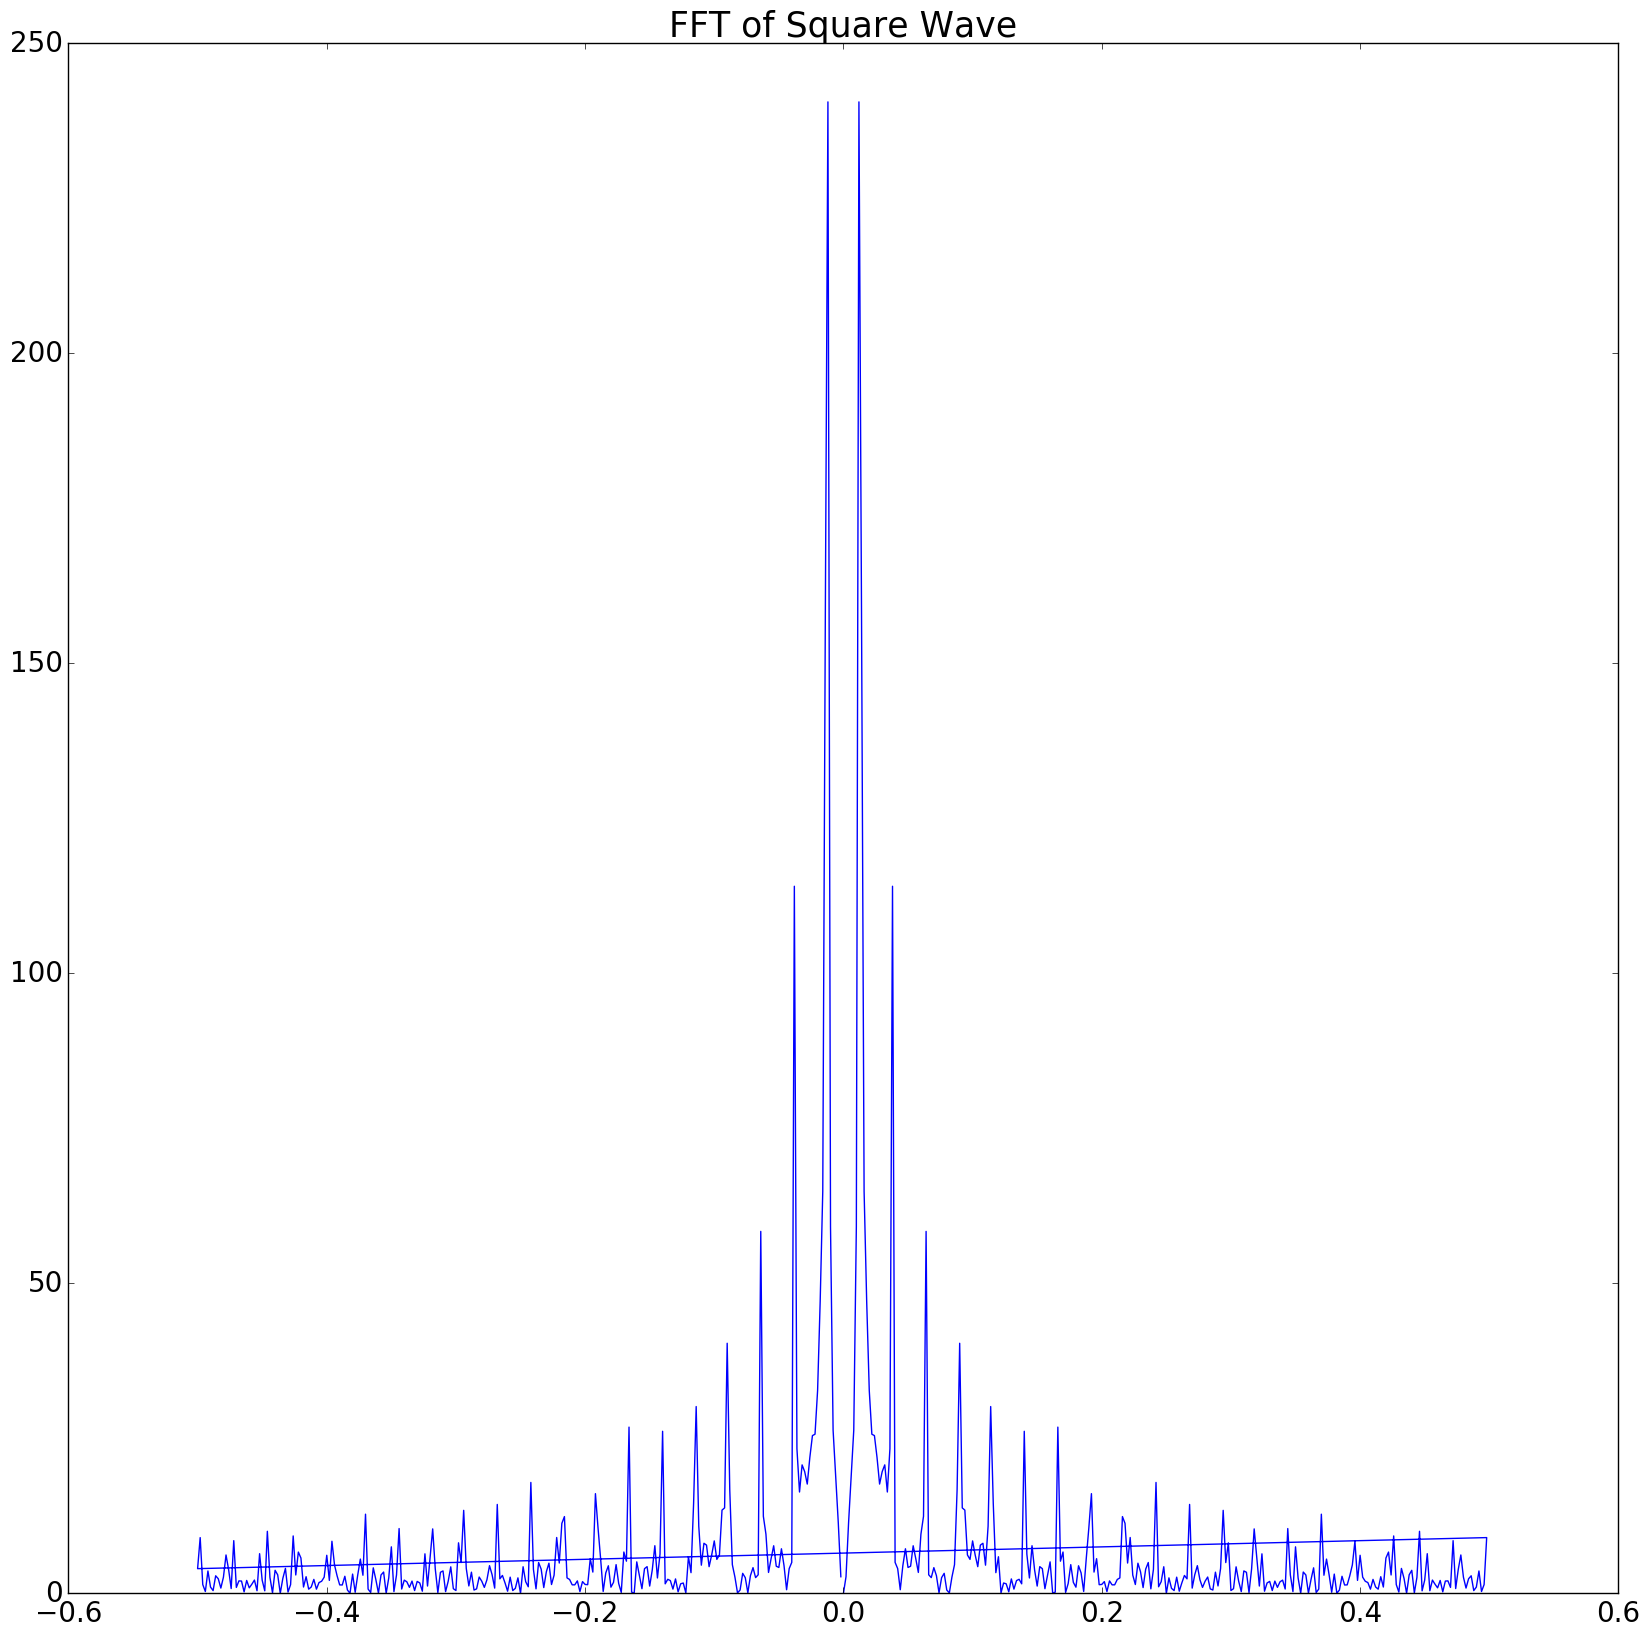

In [5]:
square_fft = np.fft.fft(square)
square_freq = np.fft.fftfreq(len(square))

plot_1D(square_freq[:], np.abs(square_fft[:]), Title='FFT of Square Wave', x_label='', y_label='', fontsize_label=20, fontsize_title=25)

The peak locations represent the frequency (in pixel-space) of the sine waves that are summed to represent the original function (square wave). The value (height) of each peak represents the weight each sine wave has, or the coefficient (amplitude) of each sine wave in the sum.

$3$. Write some code to plot a sine (or cosine, is there a difference?) function in 1D.

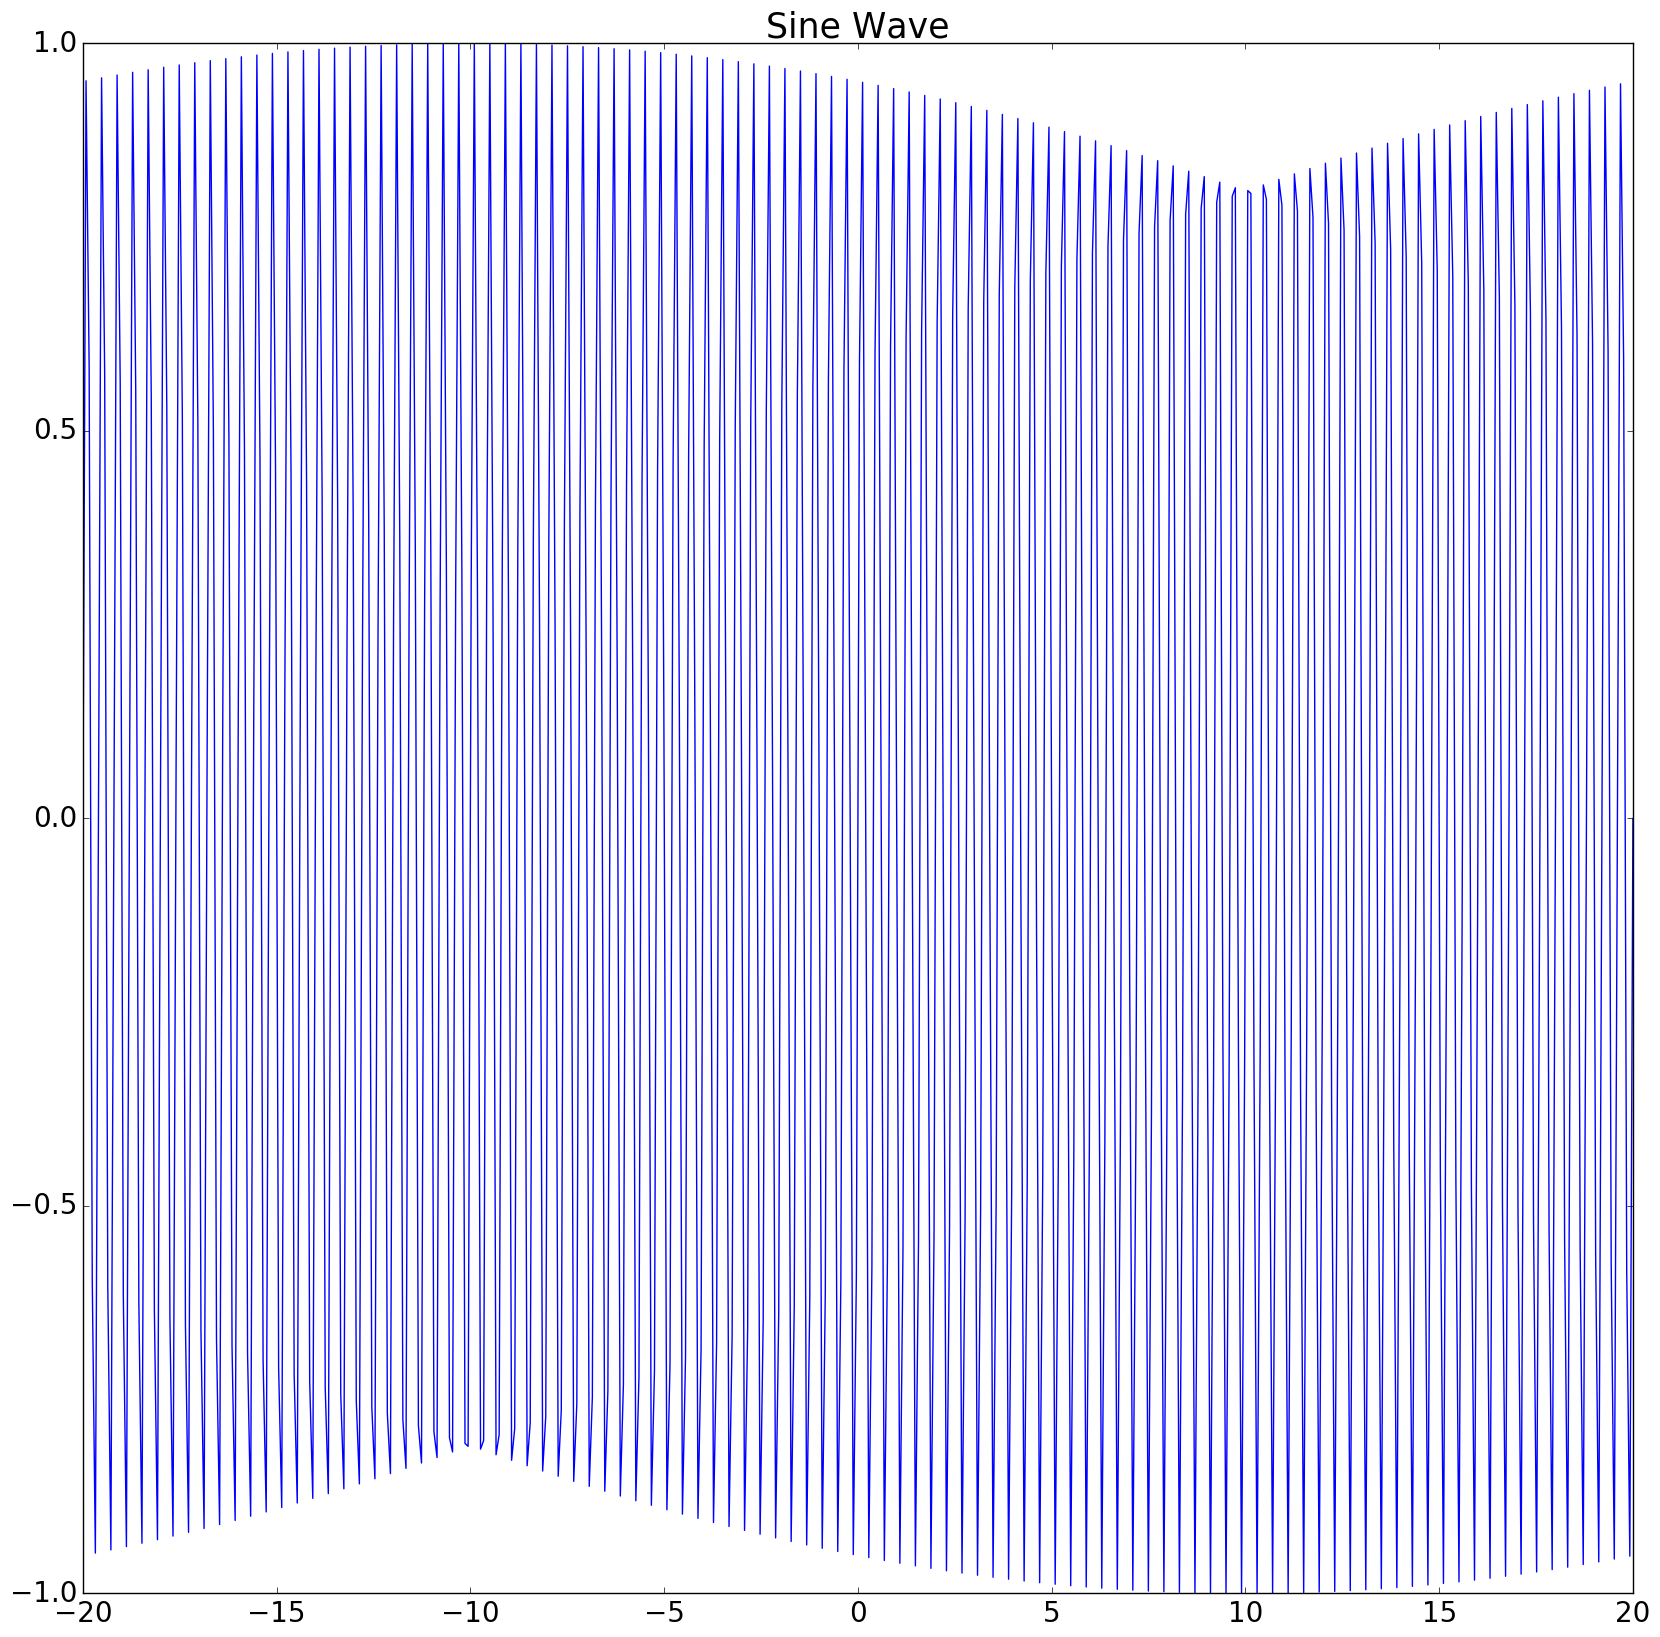

In [6]:
sine = np.sin(2*np.pi*2.5*x)

plot_1D(x, sine, Title='Sine Wave', x_label='', y_label='', fontsize_label=20, fontsize_title=25)

$4$. Take the fourier transform of the function and plot it in 1D. Explain the significance of the features in the plot?

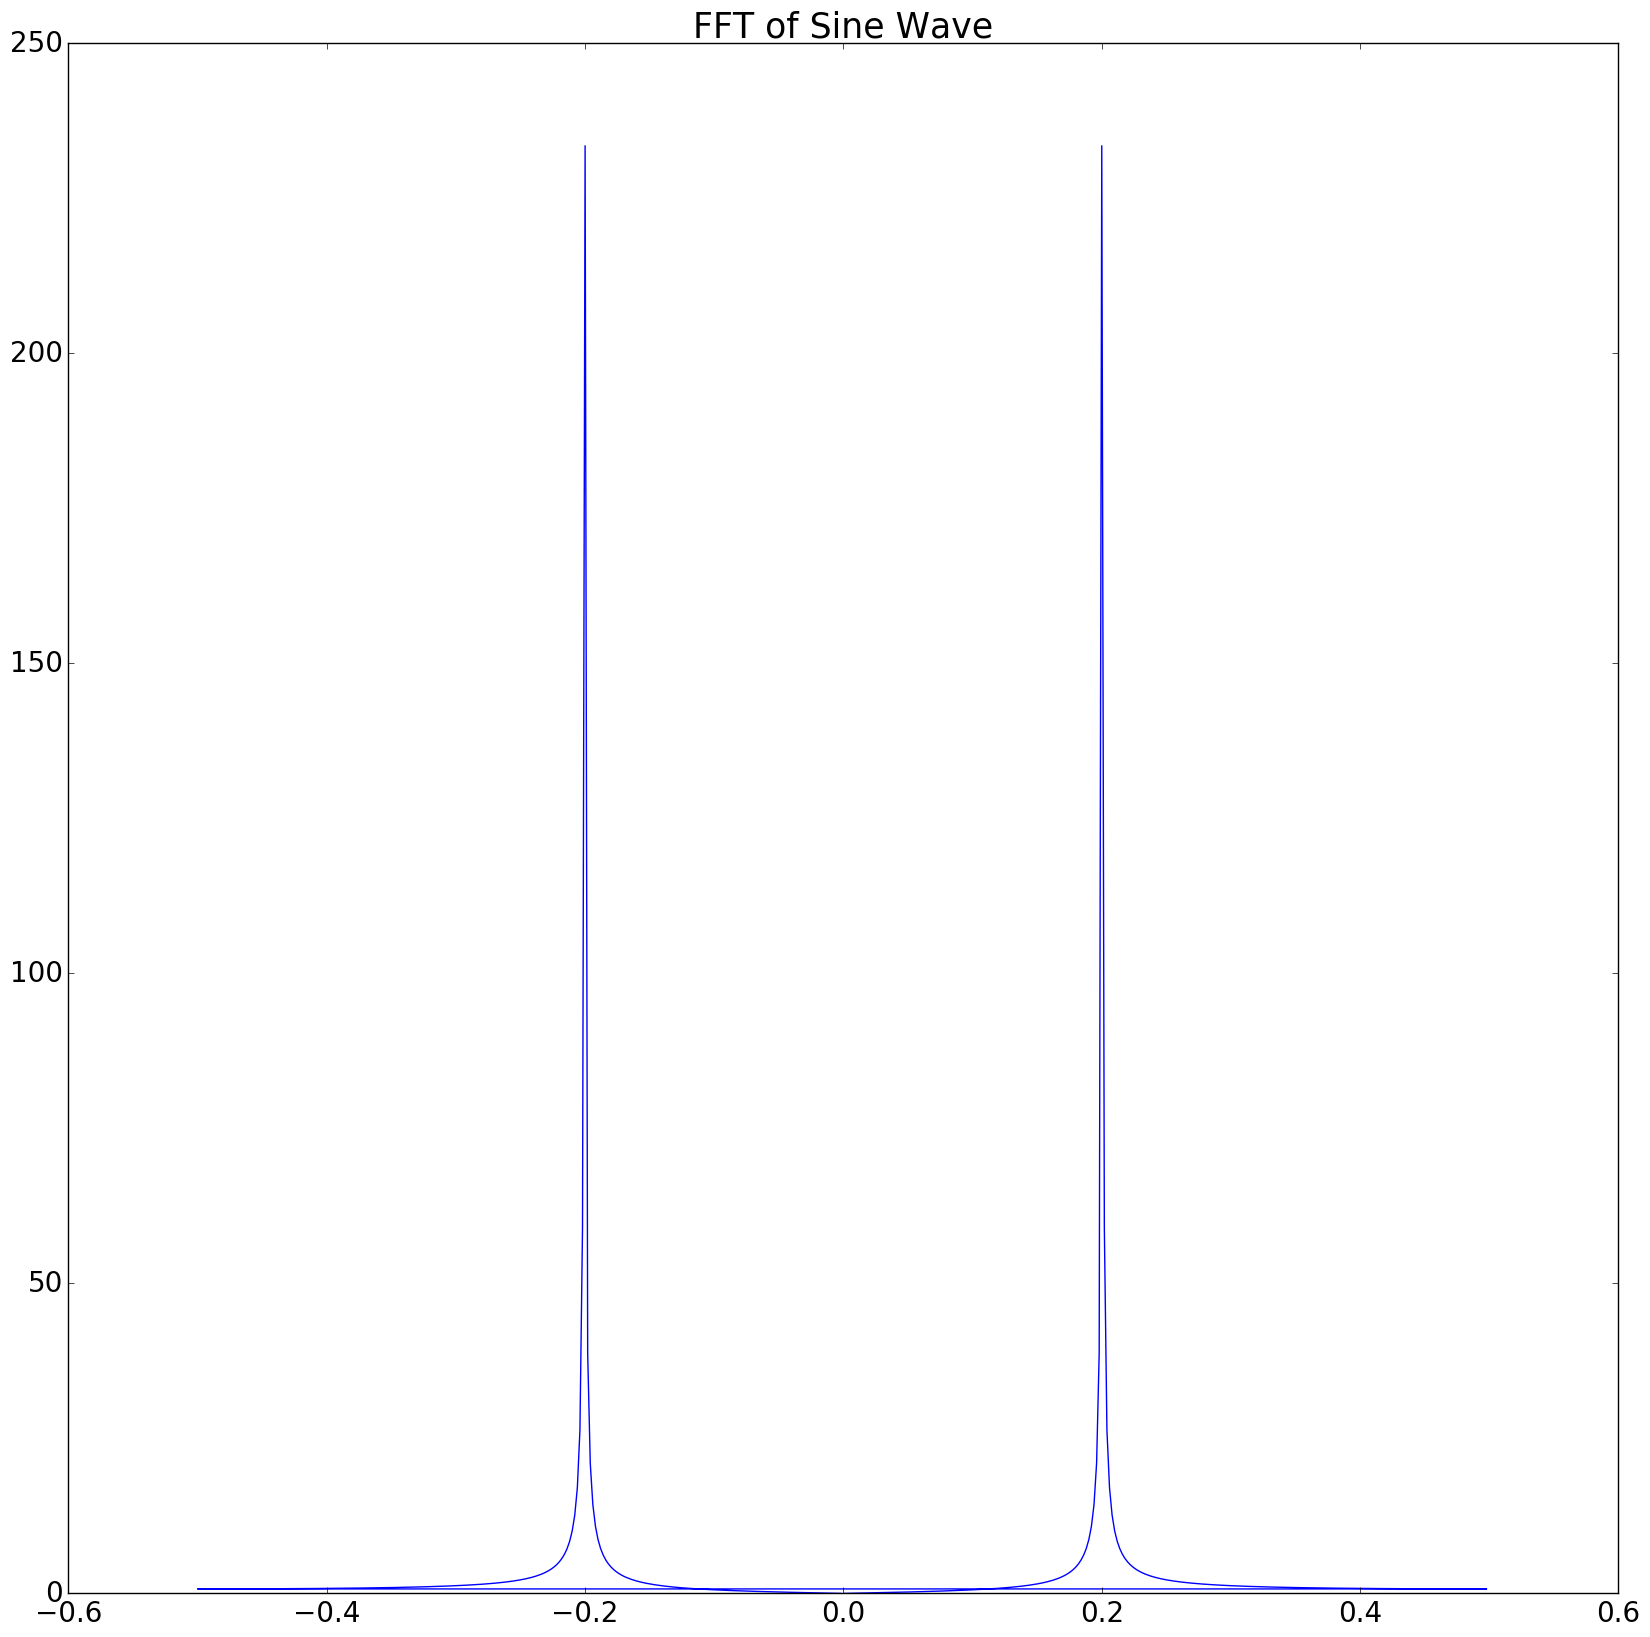

In [7]:
sine_fft = np.fft.fft(sine)
sine_freq = np.fft.fftfreq(len(sine))

plot_1D(sine_freq[:], np.abs(sine_fft[:]), Title='FFT of Sine Wave', x_label='', y_label='', fontsize_label=20, fontsize_title=25)

$5$. Write some code to 'expand' this function into a 2D image. Plot the image.

Hint:  How can you plot a 2D array?

In [57]:
def plot_2D(array, Title='Add Title', greyscale=True, colorbar=True, vmin=0.0, vmax=None, interpolate='None', x_label='Add x_label', y_label='Add y_label', x_lim=None, y_lim=None, fig_size=(20,20), fontsize_title = 15, fontsize_label = 10):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=fig_size)
    if greyscale==True:
        plt.imshow(array, cmap='gray', interpolation=interpolate, vmin=vmin, vmax=vmax)
    else:
        plt.imshow(array, interpolation=interpolate, vmin=vmin, vmax=vmax)
    plt.title(Title, fontsize=fontsize_title)
    plt.xlabel(x_label, fontsize=fontsize_label)
    plt.ylabel(y_label, fontsize=fontsize_label)
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    plt.xticks(fontsize=fontsize_label)
    plt.yticks(fontsize=fontsize_label)
    if colorbar==True:
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        ax = plt.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(cax=cax)
        plt.tick_params(labelsize=fontsize_label)

    plt.show()

In [58]:
X,Y = np.meshgrid(x, x)

print('X = ' + str(X))
print('np.shape(X) = ' + str(np.shape(X)))

print('Y = ' + str(Y))
print('np.shape(Y) = ' + str(np.shape(Y)))

X = [[-20.         -19.91983968 -19.83967936 ...,  19.83967936  19.91983968
   20.        ]
 [-20.         -19.91983968 -19.83967936 ...,  19.83967936  19.91983968
   20.        ]
 [-20.         -19.91983968 -19.83967936 ...,  19.83967936  19.91983968
   20.        ]
 ..., 
 [-20.         -19.91983968 -19.83967936 ...,  19.83967936  19.91983968
   20.        ]
 [-20.         -19.91983968 -19.83967936 ...,  19.83967936  19.91983968
   20.        ]
 [-20.         -19.91983968 -19.83967936 ...,  19.83967936  19.91983968
   20.        ]]
np.shape(X) = (500, 500)
Y = [[-20.         -20.         -20.         ..., -20.         -20.         -20.        ]
 [-19.91983968 -19.91983968 -19.91983968 ..., -19.91983968 -19.91983968
  -19.91983968]
 [-19.83967936 -19.83967936 -19.83967936 ..., -19.83967936 -19.83967936
  -19.83967936]
 ..., 
 [ 19.83967936  19.83967936  19.83967936 ...,  19.83967936  19.83967936
   19.83967936]
 [ 19.91983968  19.91983968  19.91983968 ...,  19.91983968  19.91983968
  

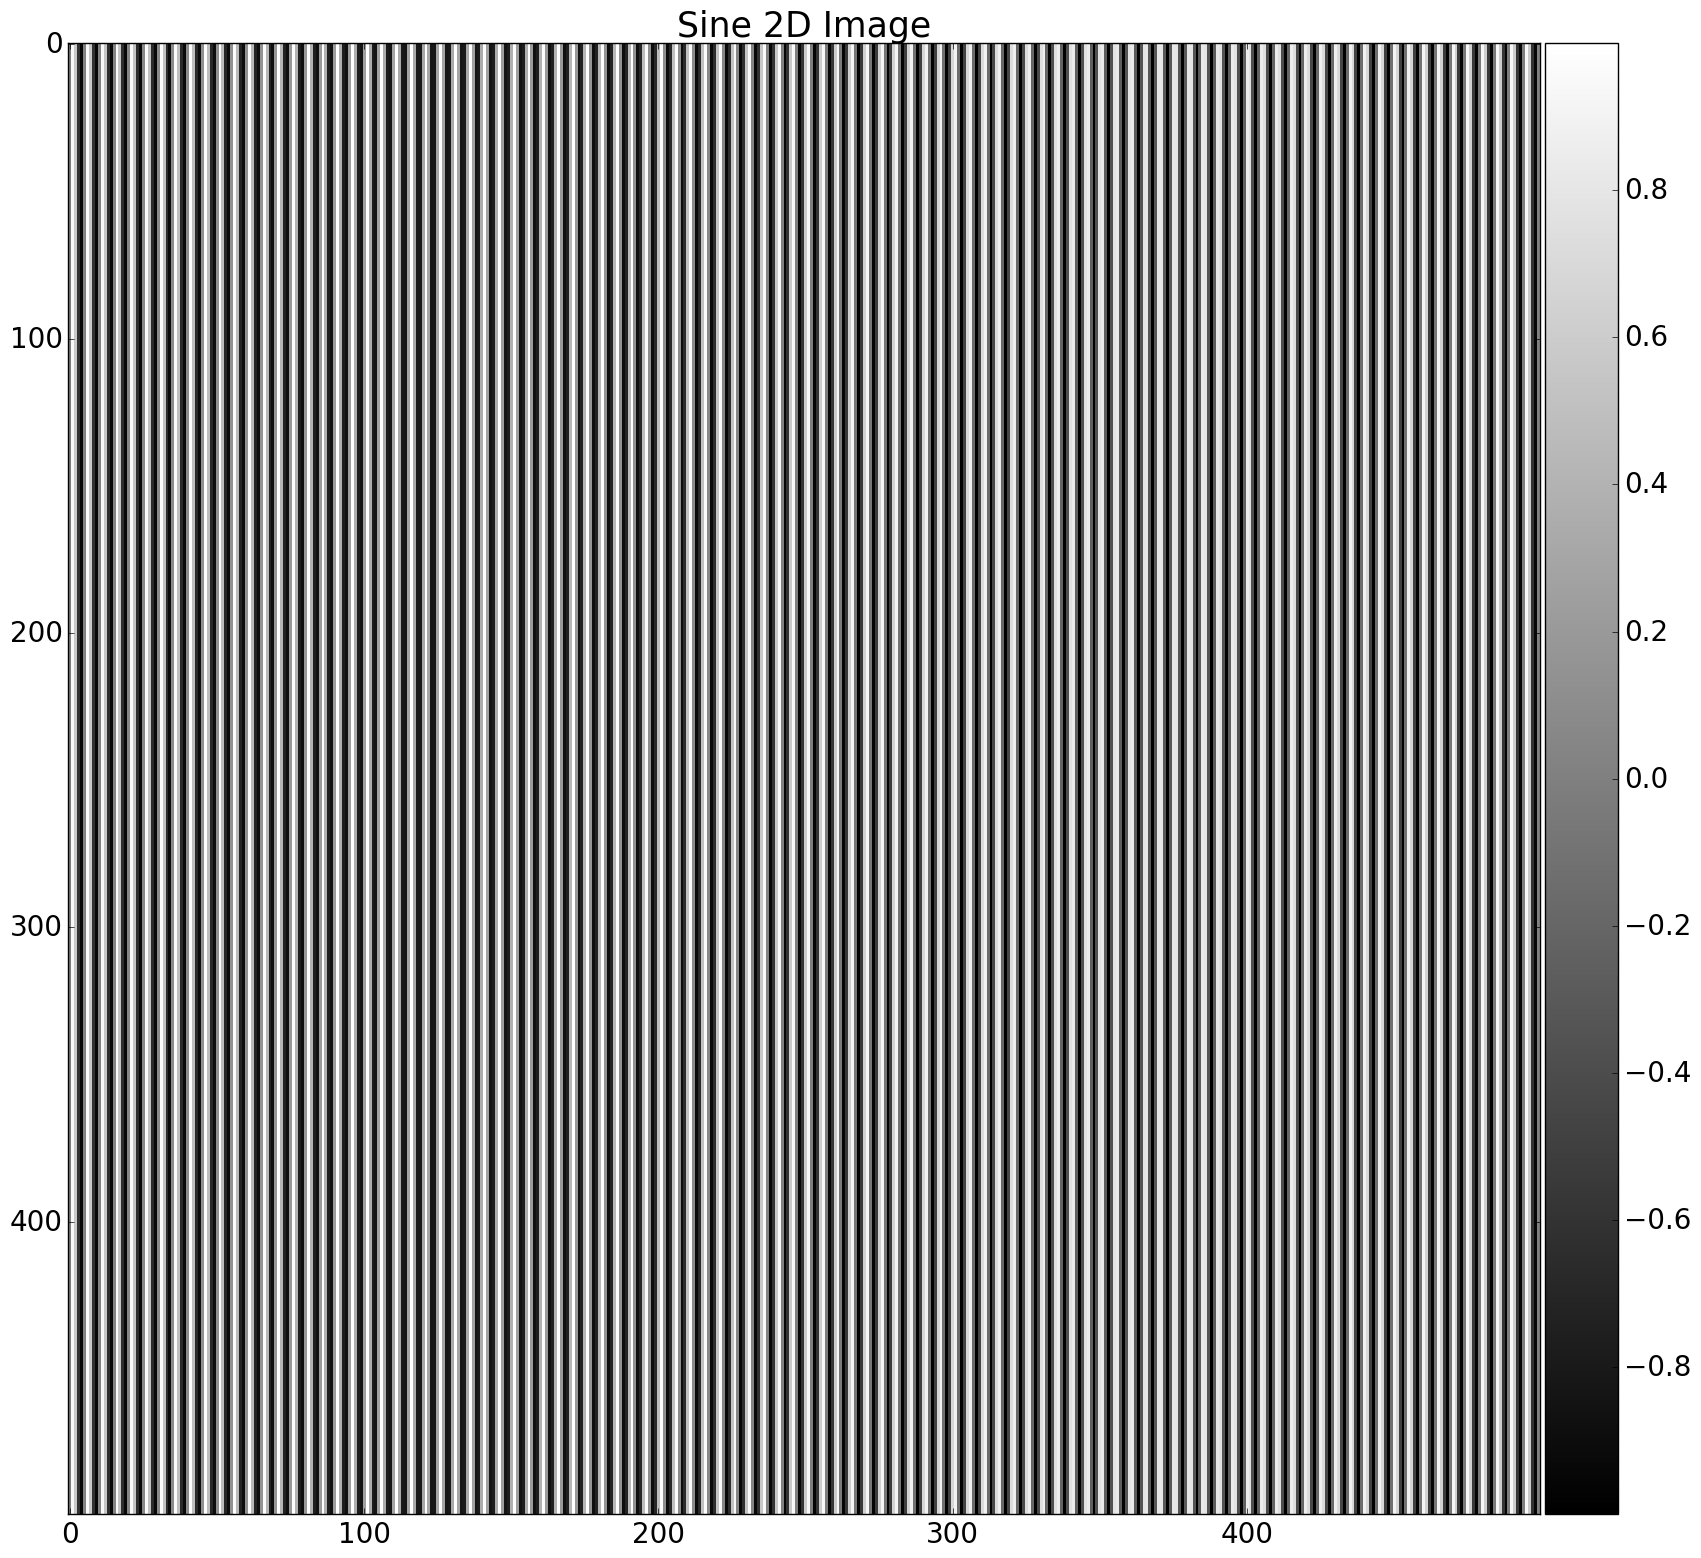

In [94]:
sine_2D = np.sin(2*np.pi*2.5*X)

plot_2D(sine_2D, Title='Sine 2D Image', greyscale=True, x_label='', interpolate='None', y_label='', x_lim=None, y_lim=None, colorbar=True, fig_size=(20,20), fontsize_title = 25, vmin=None, vmax=None, fontsize_label = 20)

$6$. Take the 2D fourier transform of the image and plot it. Explain the features in the plot.


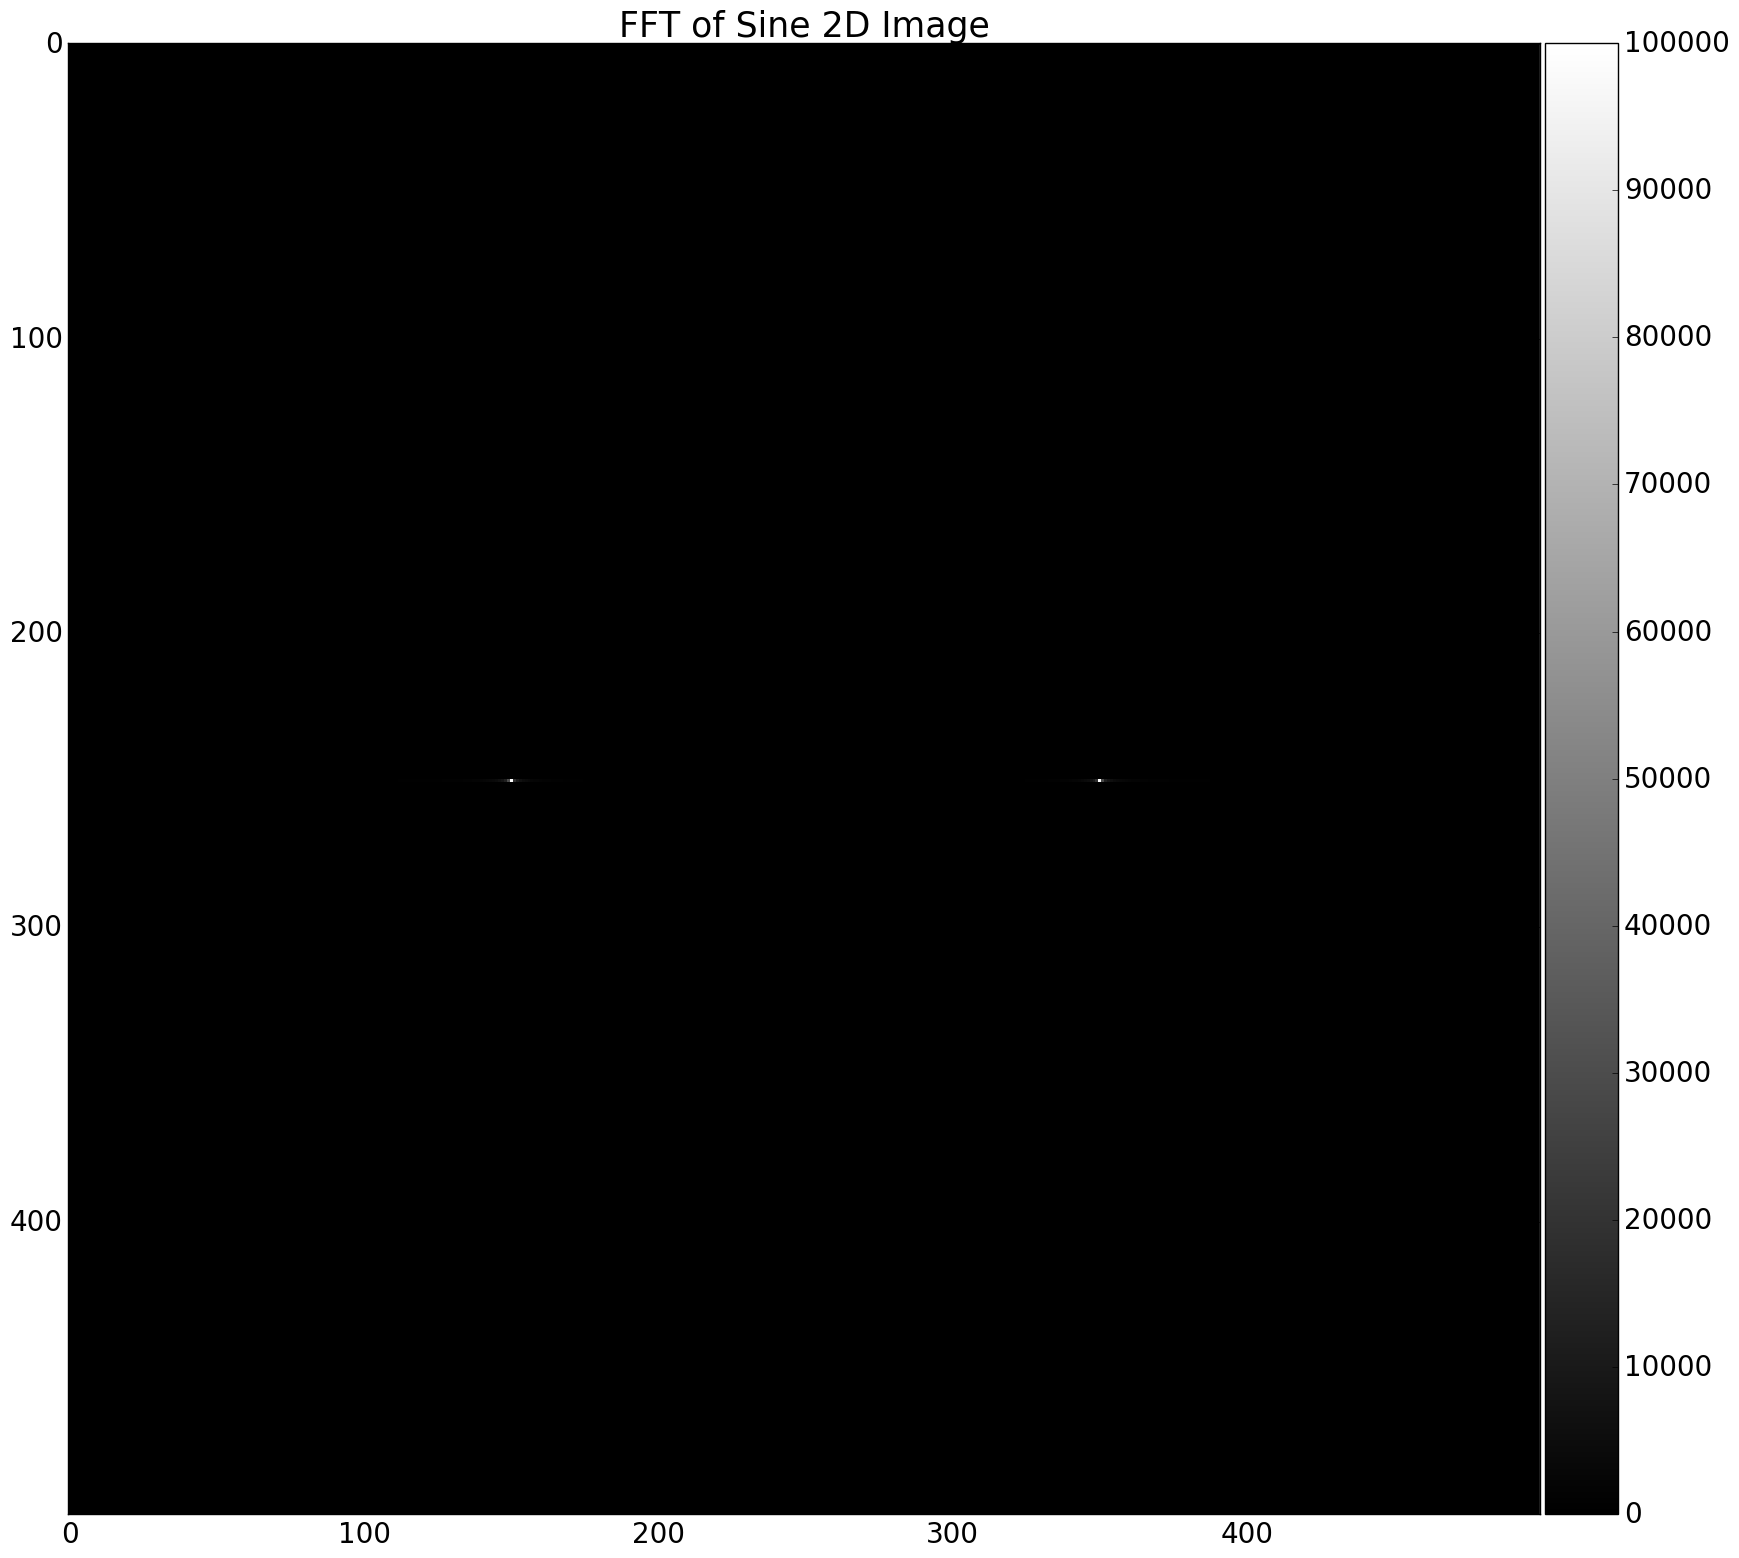

In [95]:
sine_fft_2D = np.fft.fft2(sine_2D)

plot_2D(np.abs(np.fft.fftshift(sine_fft_2D)), Title='FFT of Sine 2D Image', greyscale=True, x_label='', interpolate='None', y_label='', x_lim=None, y_lim=None, colorbar=True, fig_size=(20,20), fontsize_title = 25, vmax=100000, vmin=None, fontsize_label = 20)

$7$. Rotate the image so that the sine grating can be oriented at any arbitrary angle, $\alpha$.

alpha = 0.524 radians or 30 degrees.


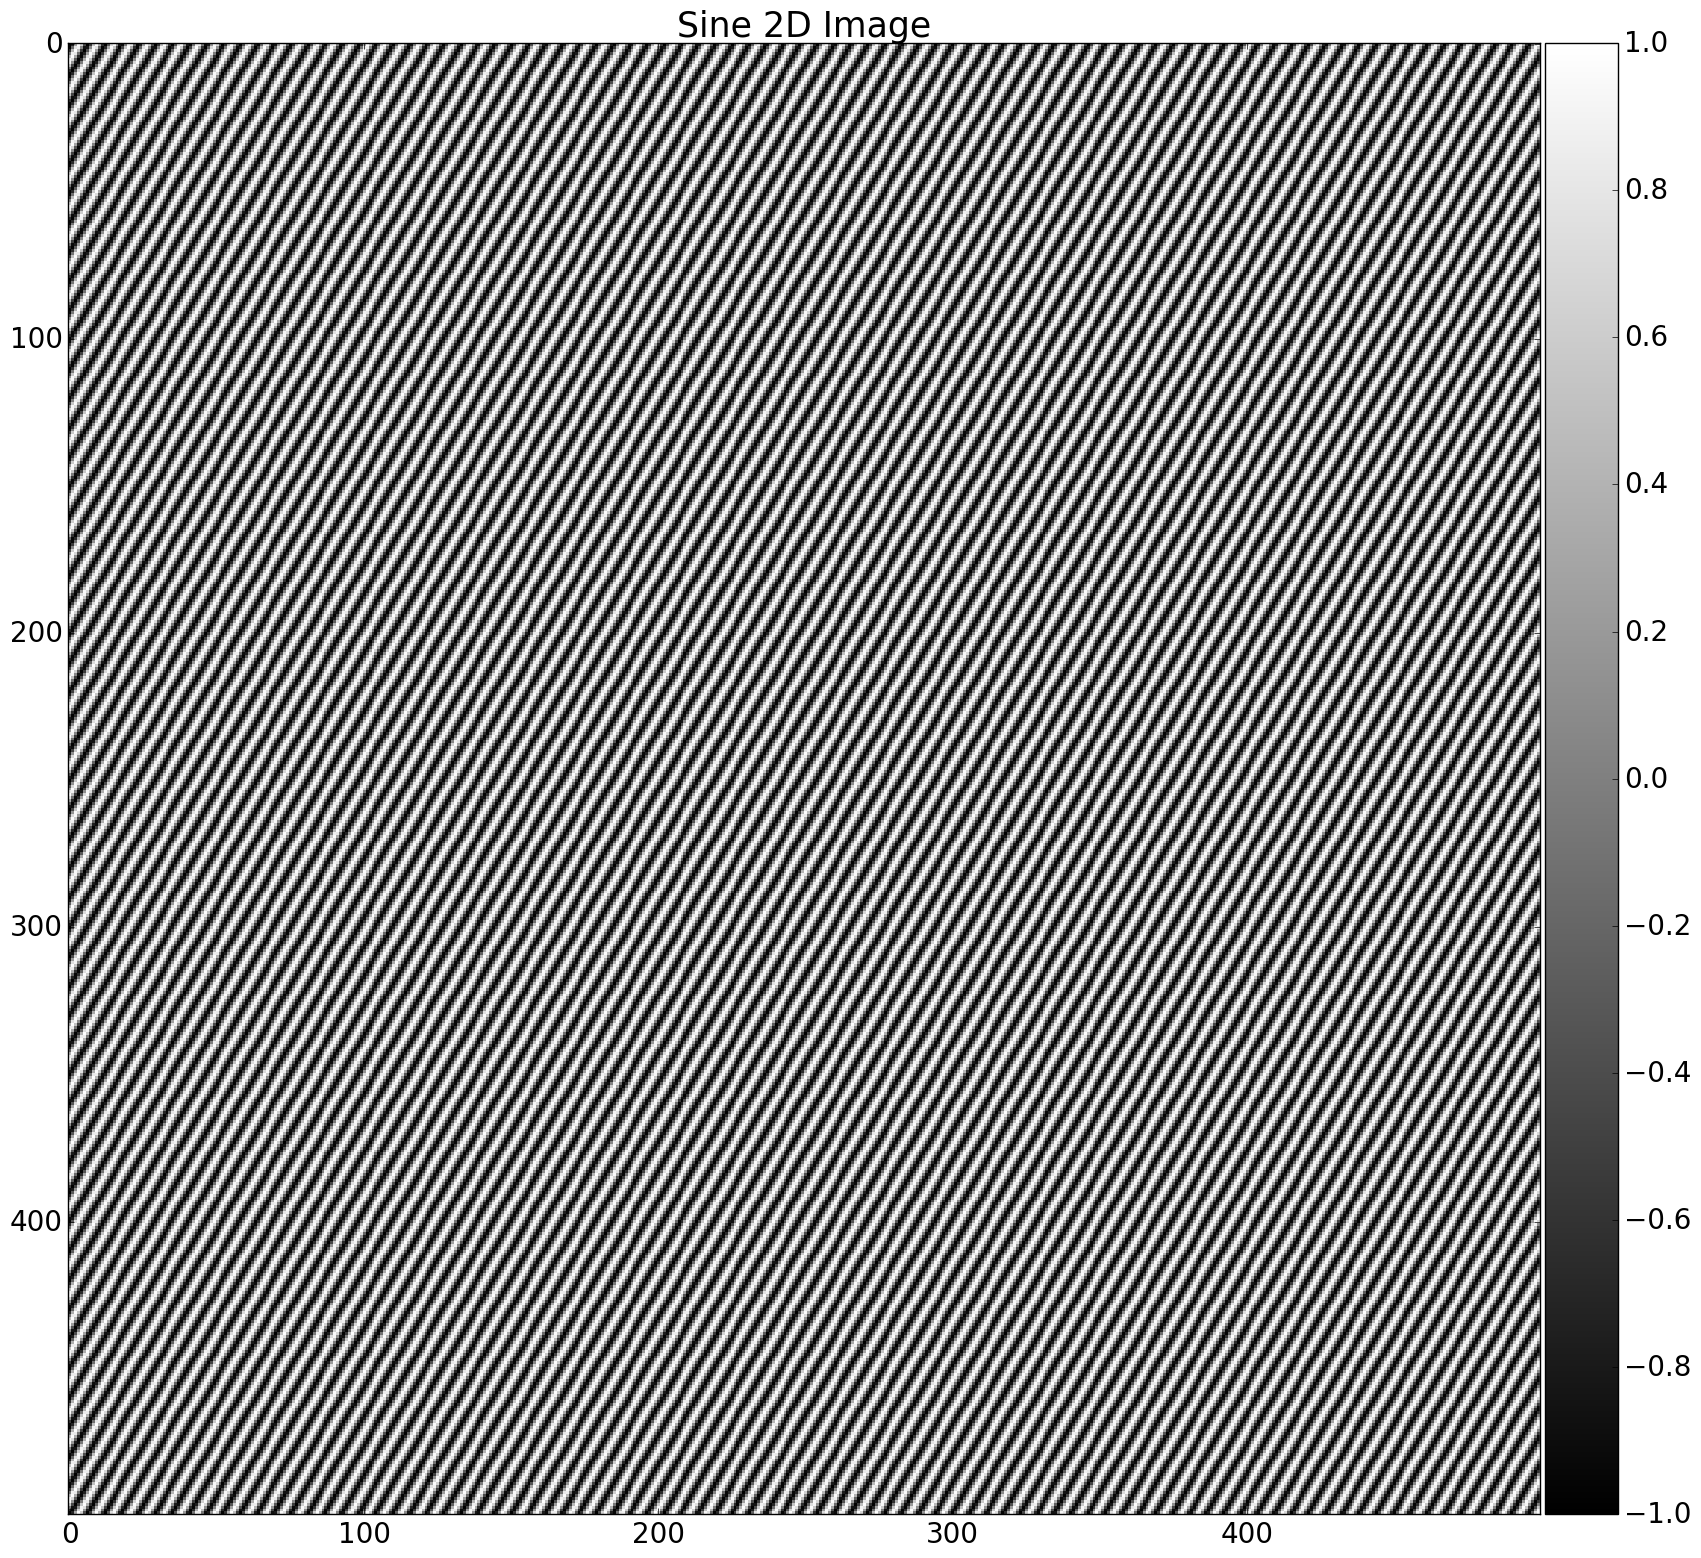

In [112]:
alpha_deg = 30
alpha = alpha_deg*np.pi/180 #rad
print('alpha = %0.3g' % alpha + ' radians or %0.3g' % alpha_deg + ' degrees.')

sine_2D = np.sin(2*np.pi*2.5*(np.cos(alpha)*X + np.sin(alpha)*Y))

plot_2D(sine_2D, Title='Sine 2D Image', greyscale=True, x_label='', interpolate='None', y_label='', x_lim=None, y_lim=None, colorbar=True, fig_size=(20,20), fontsize_title = 25, vmin=None, vmax=None, fontsize_label = 20)

$8$. Before plotting the FFT (Fourier Transform) of the rotated image, explain what you think the FFT will look like.

The FFT should look like the original one, but the peaks will be along the rotated axis of periodicity, rather than the horizontal axis.

$9$. Plot the FFT of the rotated image for $\alpha = \frac{\pi}{6} \left[\mathrm{rad}\right]$.

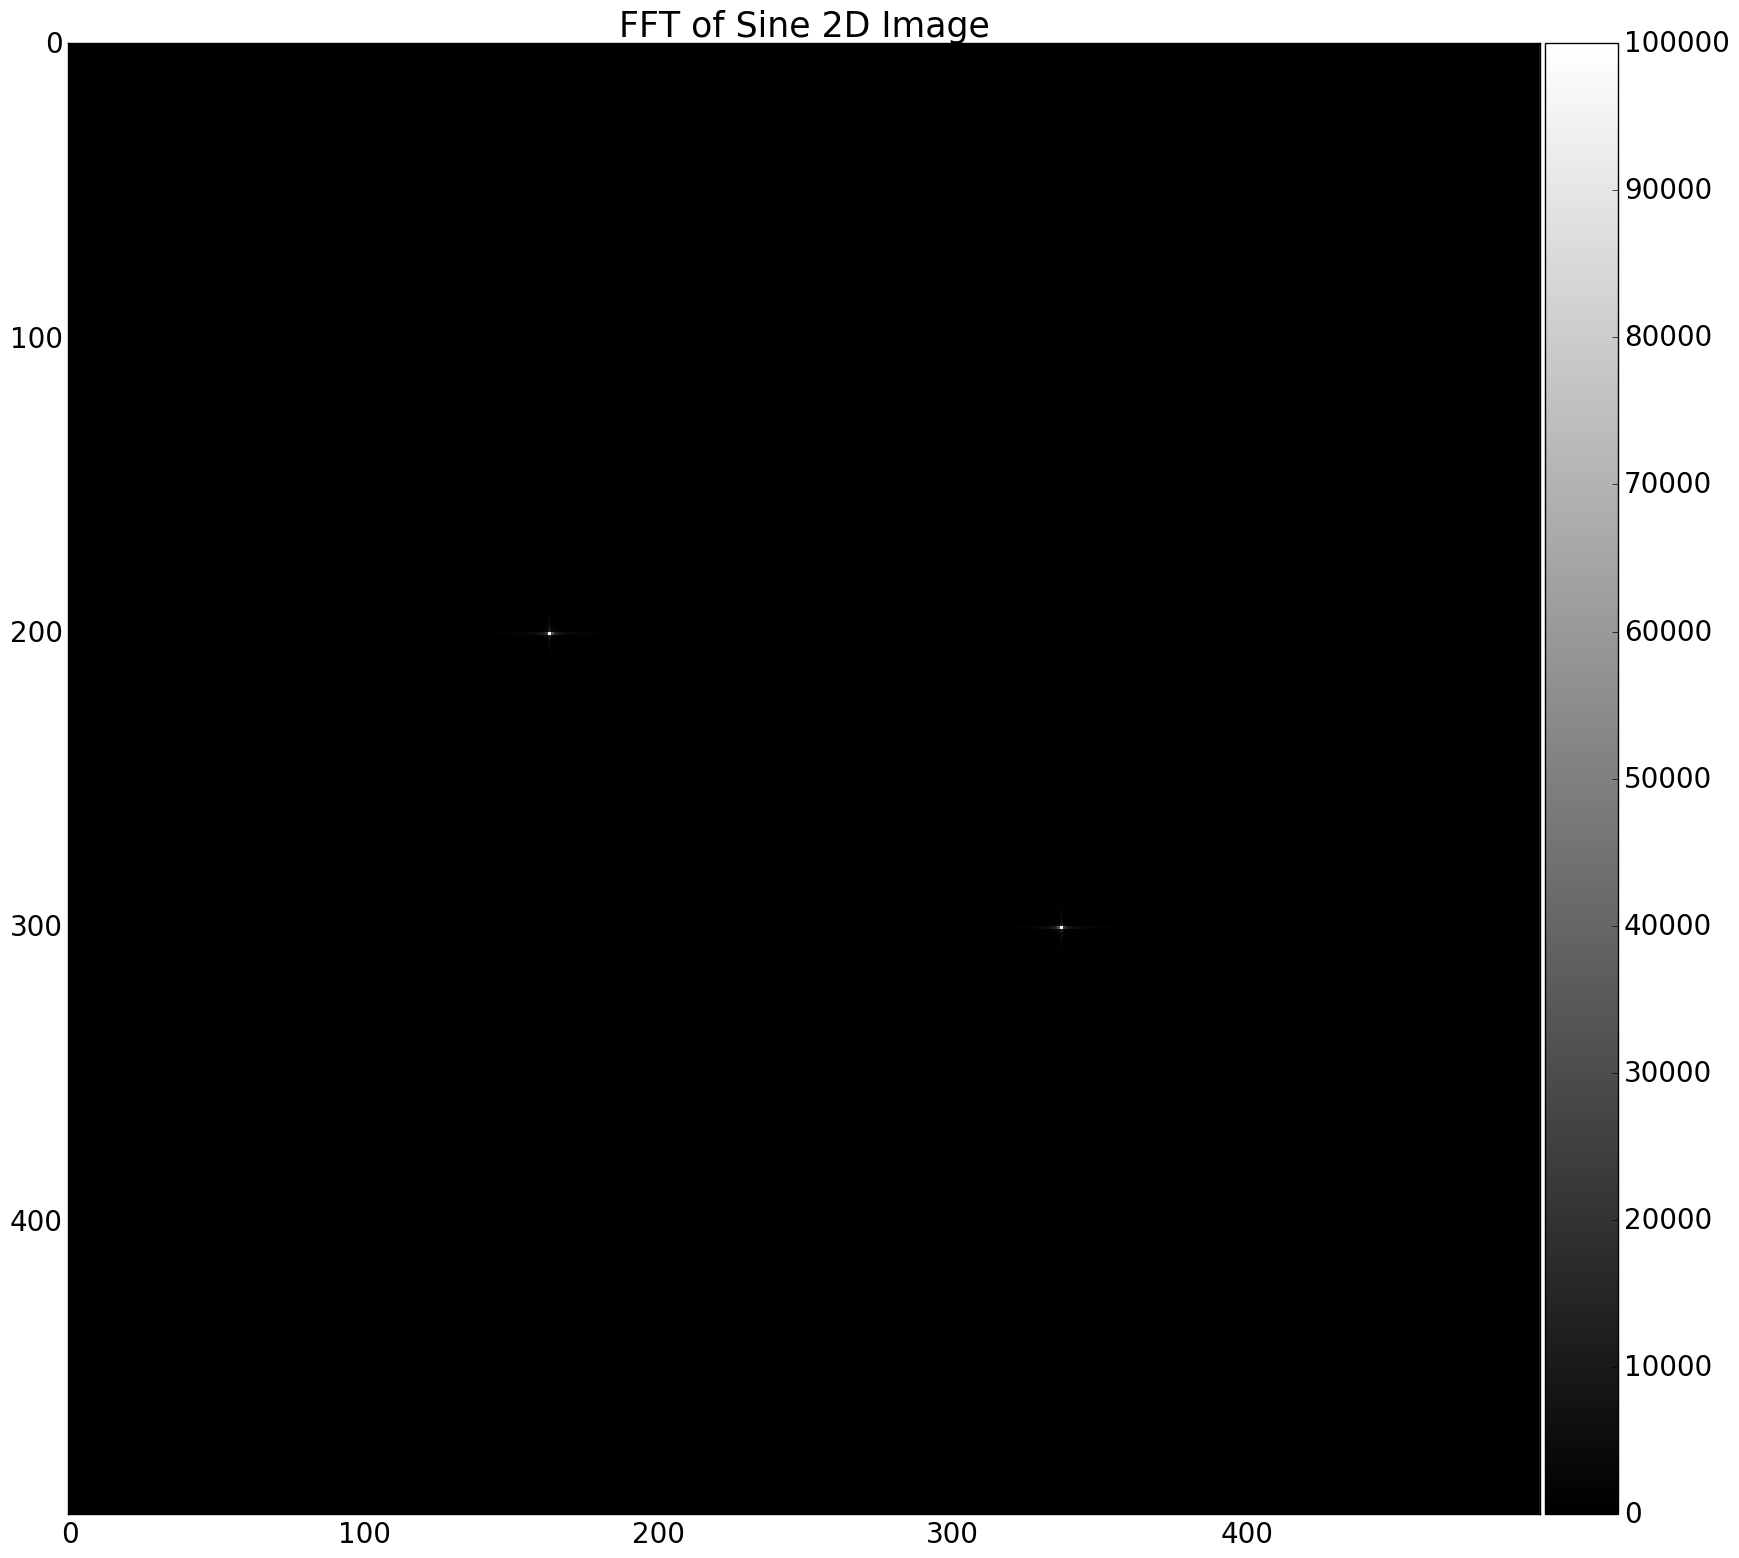

In [113]:
sine_fft_2D = np.fft.fft2(sine_2D)

plot_2D(np.abs(np.fft.fftshift(sine_fft_2D)), Title='FFT of Sine 2D Image', greyscale=True, x_label='', interpolate='None', y_label='', x_lim=None, y_lim=None, colorbar=True, fig_size=(20,20), fontsize_title = 25, vmax=100000, vmin=None, fontsize_label = 20)

In the actual microscope, we want to match the grating to the pre-existing circular apertures. This means that the sine gratings are superimposed with a circular 'mask' that only allows electrons to pass inside the circle of radius $R$ and blocks all electrons that are outside of this radius.

$10$. Write some code to simulate a ciruclar sine grating of radius $R = 200 \left[\mathrm{pixels}\right]$. Plot the image along with its FFT. How is the FFT different with the circular mask?

alpha = 0.524 radians or 30 degrees.


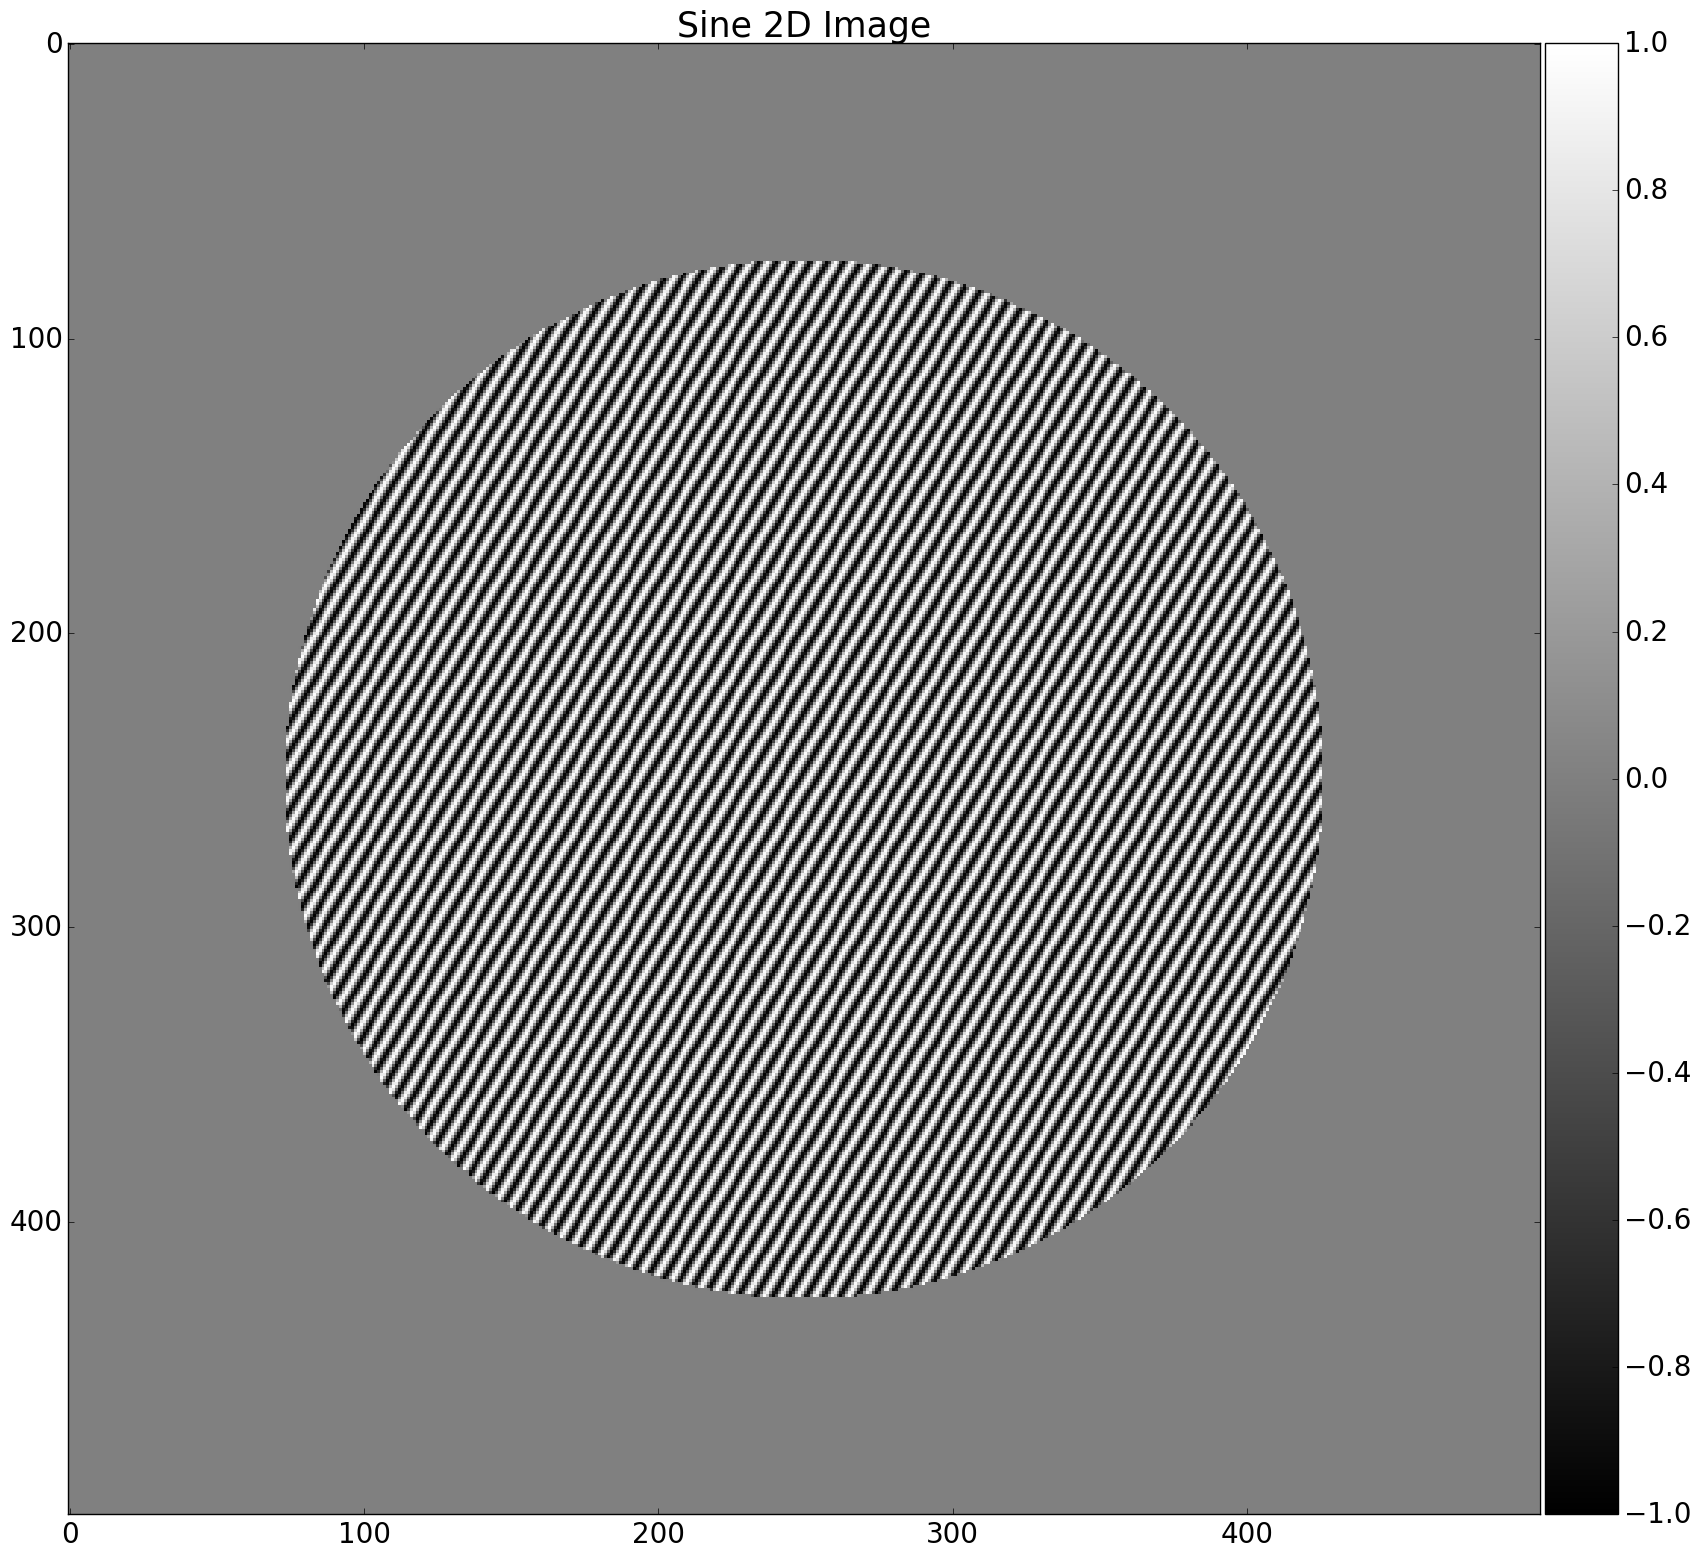

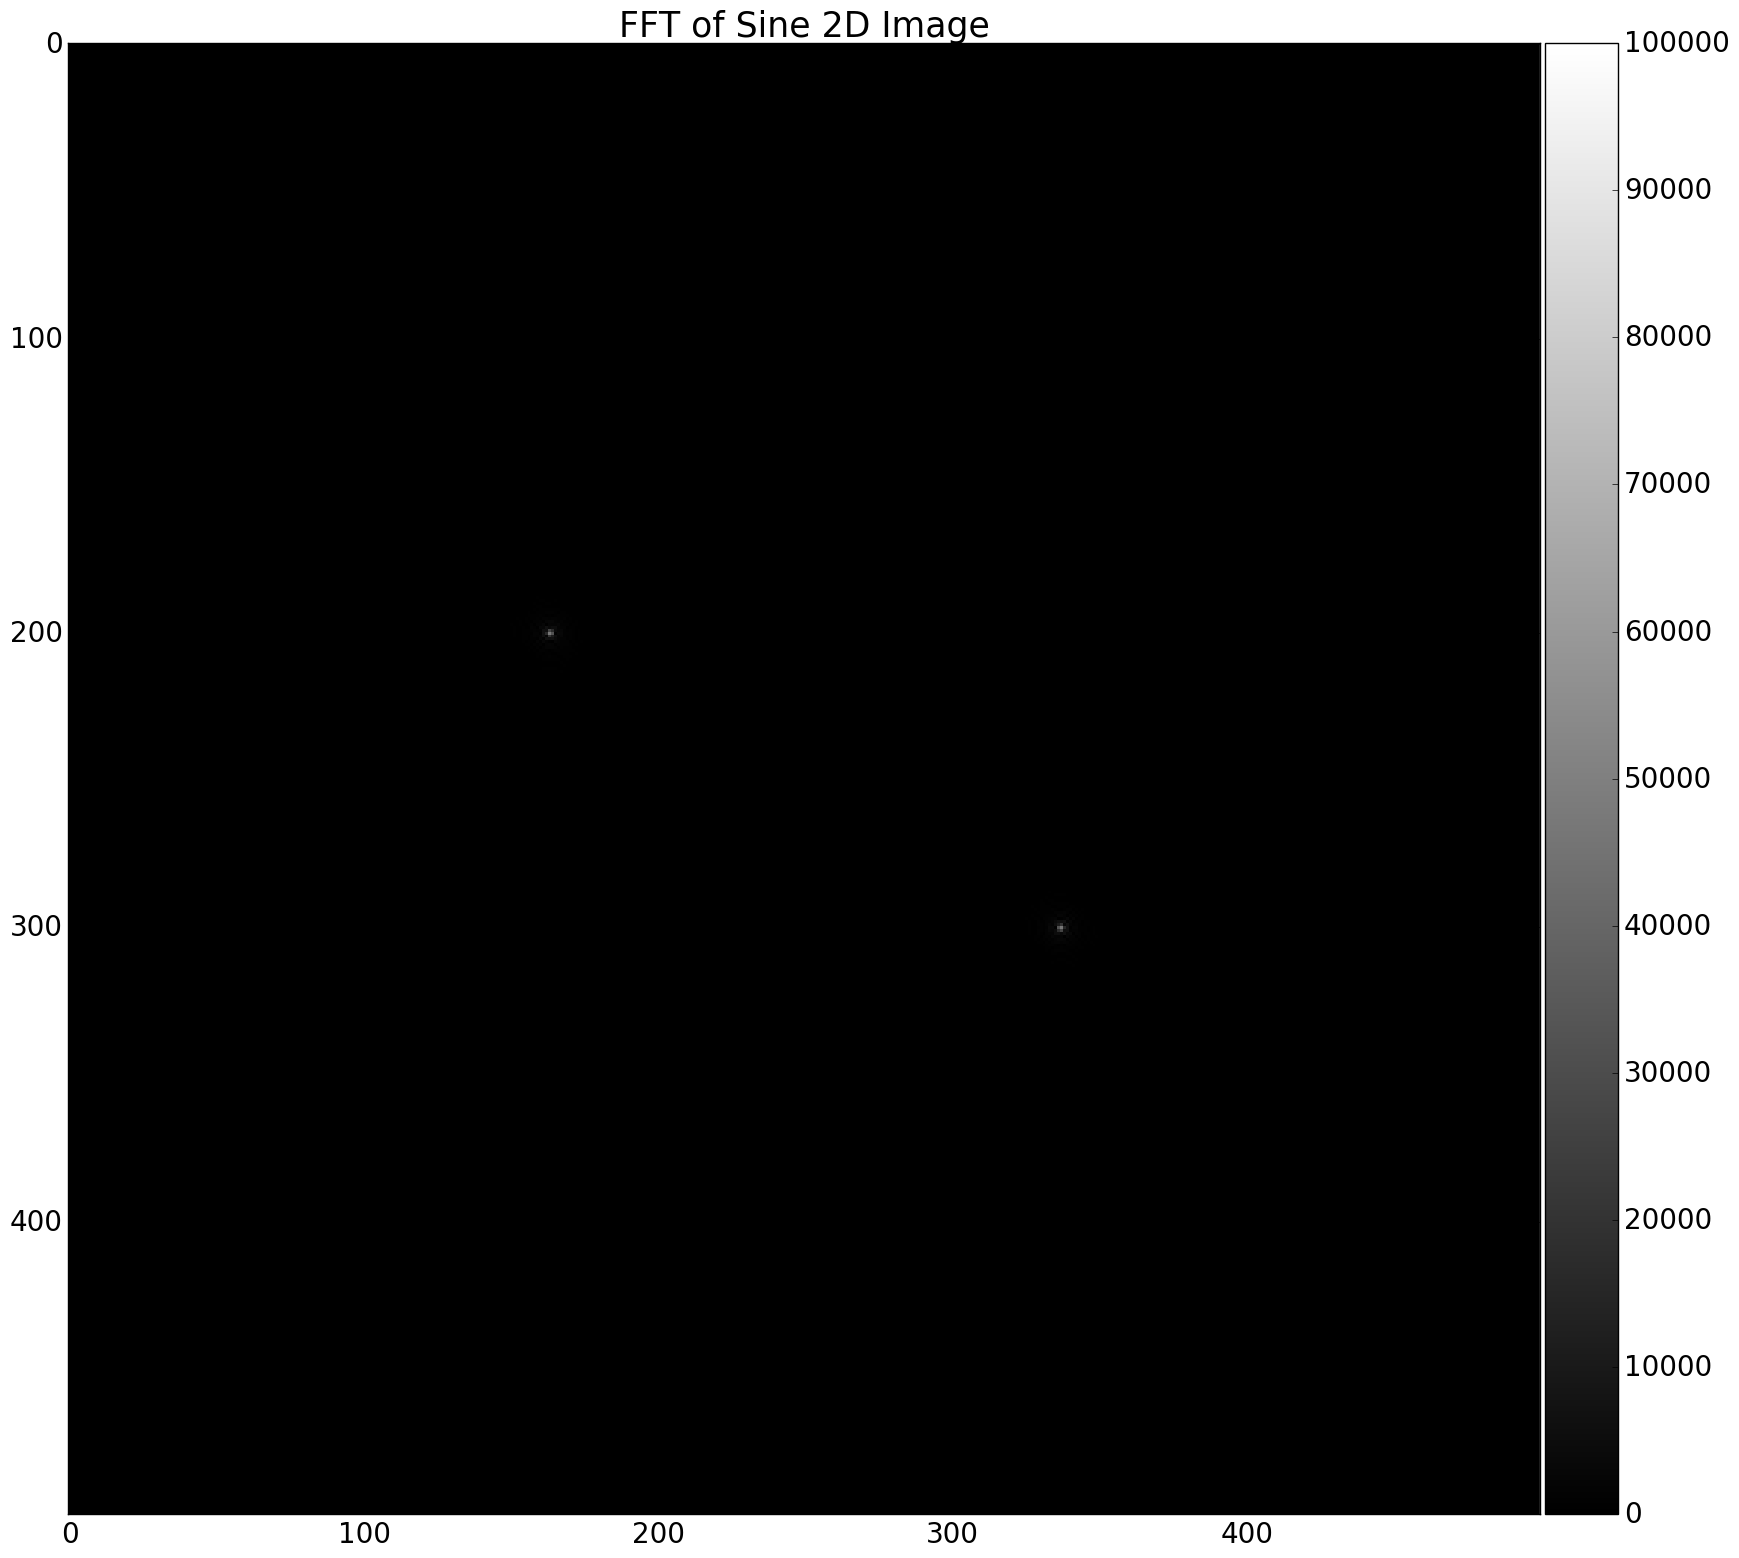

In [116]:
alpha_deg = 30
alpha = alpha_deg*np.pi/180 #rad
print('alpha = %0.3g' % alpha + ' radians or %0.3g' % alpha_deg + ' degrees.')

R = 200 #[pix]

mask = X**2 + Y**2 < R
sine_2D = np.sin(2*np.pi*2.5*(np.cos(alpha)*X + np.sin(alpha)*Y)) * mask

plot_2D(sine_2D, Title='Sine 2D Image', greyscale=True, x_label='', interpolate='None', y_label='', x_lim=None, y_lim=None, colorbar=True, fig_size=(20,20), fontsize_title = 25, vmin=None, vmax=None, fontsize_label = 20)

sine_fft_2D = np.fft.fft2(sine_2D)

plot_2D(np.abs(np.fft.fftshift(sine_fft_2D)), Title='FFT of Sine 2D Image', greyscale=True, x_label='', interpolate='None', y_label='', x_lim=None, y_lim=None, colorbar=True, fig_size=(20,20), fontsize_title = 25, vmax=100000, vmin=None, fontsize_label = 20)